# Kwantyzacja - zadanie dodatkowe

## Czynności wstępne

### Wczytanie obrazu

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

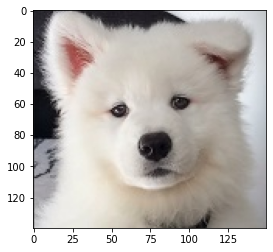

In [2]:
img = mpimg.imread('image.jpg')
plt.imshow(img)

### Przekształcenie orbazu do formy wierszowej

In [3]:
import numpy as np

height, width, _ = img.shape
img_reshaped = np.reshape(img, (height * width, 3))

### Testowa kwantyzacja przy użyciu k-means

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(img_reshaped)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
img_quant = centers[labels, :].reshape(height, width, 3).astype(int)

### Wyświetlanie skwantyzowanego obrazu

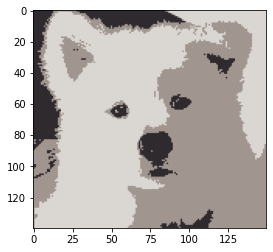

In [5]:
plt.imshow(img_quant)

In [6]:
from skimage.metrics import mean_squared_error

mean_squared_error(img, img_quant)

390.3716825396825

In [7]:
mse_image = np.mean((img - img_quant)**2, axis=2)

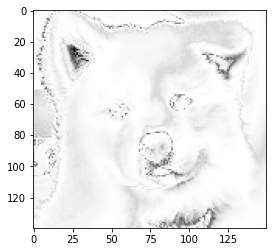

In [8]:
plt.imshow(mse_image, cmap='Greys')

## Przeprowadzenie badań

### K-Means

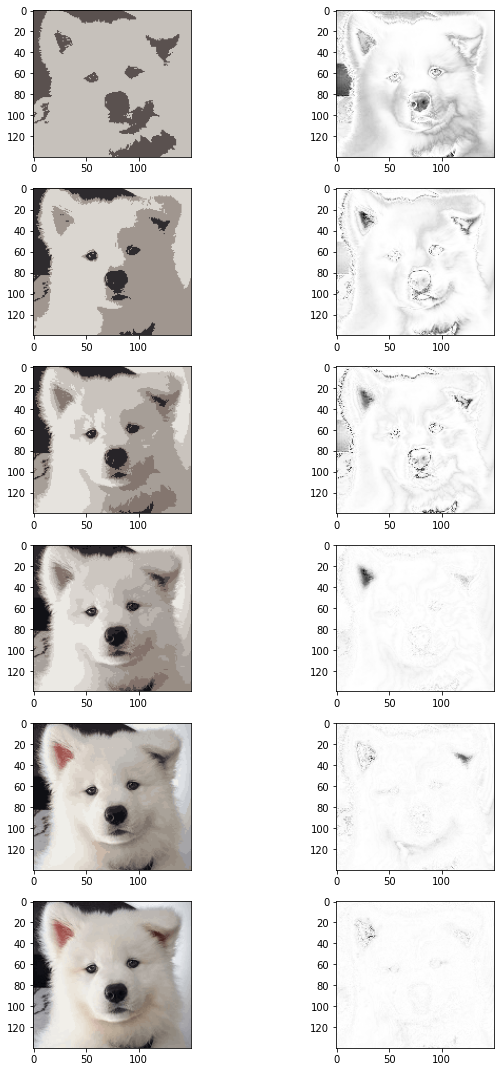

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from skimage.metrics import mean_squared_error

img = mpimg.imread('image.jpg')
height, width, _ = img.shape
img_reshaped = np.reshape(img, (-1, 3))

kmeans_mse_data = {}
    
n_clusters = [2, 3, 5, 10, 30, 100]
fig, axes = plt.subplots(len(n_clusters), 2, figsize=(10, 15))

for idx, n_cluster in enumerate(n_clusters):
    model = KMeans(n_clusters=n_cluster).fit(img_reshaped)
    centers = model.cluster_centers_
    labels = model.labels_
    img_quant = centers[labels, :].reshape(height, width, 3).astype(int)
    axes[idx, 0].imshow(img_quant)

    mse = mean_squared_error(img, img_quant)
    kmeans_mse_data[n_cluster] = mse
    mse_image = np.mean((img - img_quant)**2, axis=2)
    axes[idx, 1].imshow(mse_image, cmap='Greys')
plt.tight_layout()

In [10]:
kmeans_mse_data

{2: 1141.4424285714285,
 3: 390.5118412698413,
 5: 161.29339682539683,
 10: 62.67814285714286,
 30: 20.98853968253968,
 100: 6.7906031746031745}

### GMM

c:\dev\data_mining\.venv\lib\site-packages\sklearn\mixture\_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


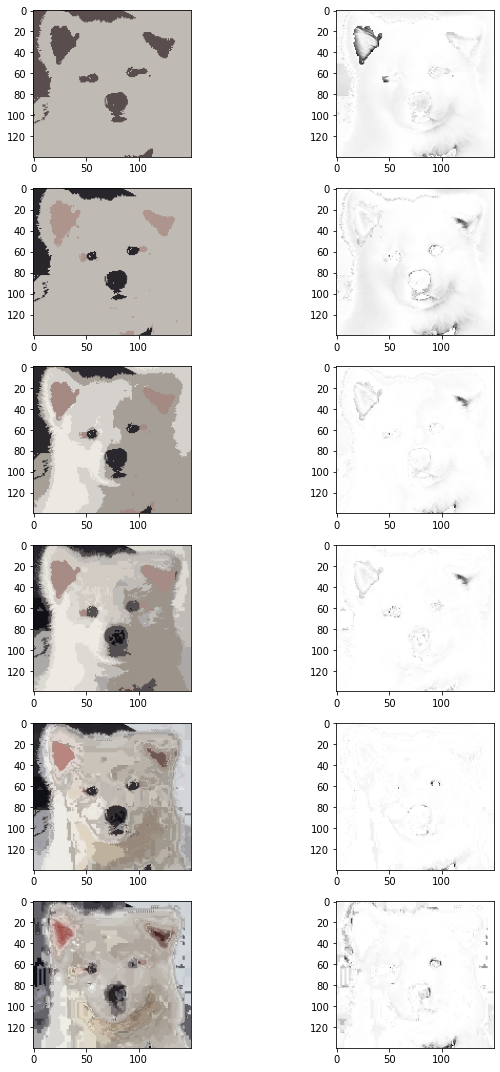

In [17]:
from sklearn.mixture import GaussianMixture

gmm_mse_data = {}
    
fig, axes = plt.subplots(len(n_clusters), 2, figsize=(10, 15))

for idx, n_cluster in enumerate(n_clusters):
    model = GaussianMixture(n_components=n_cluster).fit(img_reshaped)
    centers = model.means_
    labels = model.predict(img_reshaped)
    img_quant = centers[labels, :].reshape(height, width, 3).astype(int)
    axes[idx, 0].imshow(img_quant)

    mse = mean_squared_error(img, img_quant)
    gmm_mse_data[n_cluster] = mse
    mse_image = np.mean((img - img_quant)**2, axis=2)
    axes[idx, 1].imshow(mse_image, cmap='Greys')
plt.tight_layout()

In [18]:
gmm_mse_data

{2: 1633.0613492063492,
 3: 1311.897634920635,
 5: 426.92938095238094,
 10: 333.0024285714286,
 30: 542.933634920635,
 100: 1342.3921904761905}

### Agglomerative

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

labels = AgglomerativeClustering(n_clusters=3).fit_predict(img_reshaped)
clf = NearestCentroid()
clf.fit(img_reshaped, labels)
centers = clf.centroids_


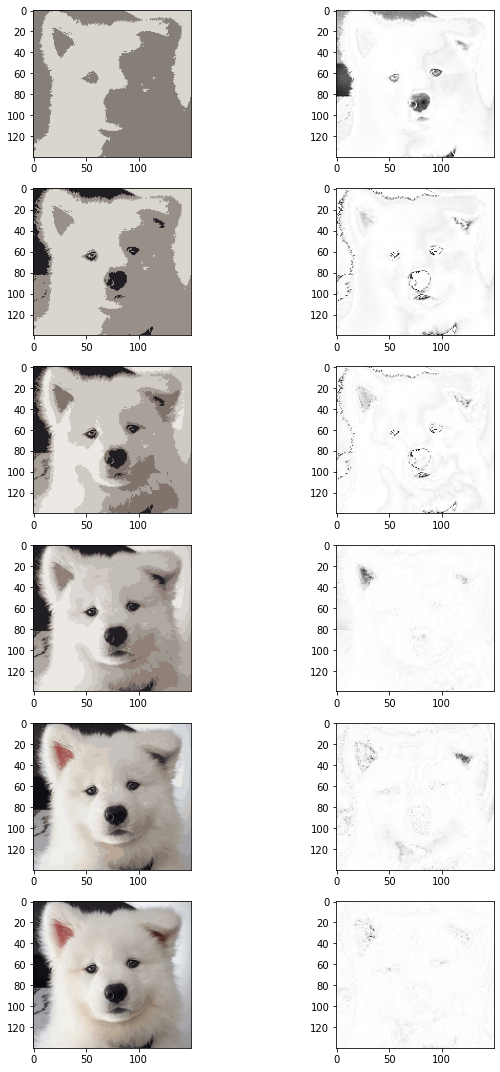

In [20]:
from sklearn.mixture import GaussianMixture

agglomerative_mse_data = {}
    
fig, axes = plt.subplots(len(n_clusters), 2, figsize=(10, 15))

for idx, n_cluster in enumerate(n_clusters):
    labels = AgglomerativeClustering(n_clusters=n_cluster).fit_predict(img_reshaped)
    clf = NearestCentroid()
    clf.fit(img_reshaped, labels)
    centers = clf.centroids_

    img_quant = centers[labels, :].reshape(height, width, 3).astype(int)
    axes[idx, 0].imshow(img_quant)

    mse = mean_squared_error(img, img_quant)
    agglomerative_mse_data[n_cluster] = mse
    mse_image = np.mean((img - img_quant)**2, axis=2)
    axes[idx, 1].imshow(mse_image, cmap='Greys')
plt.tight_layout()

In [21]:
agglomerative_mse_data

{2: 1323.0875396825397,
 3: 506.0715714285714,
 5: 214.2532857142857,
 10: 75.26631746031747,
 30: 24.046857142857142,
 100: 7.822952380952381}

## Porównanie

In [25]:
import pandas as pd
pd.DataFrame.from_records([kmeans_mse_data, gmm_mse_data,agglomerative_mse_data], index=['kmeans', 'gmm', 'agglomerative'])

,2,3,5,10,30,100
kmeans,1141.442429,390.464063,161.269857,62.538587,20.778159,6.796603
gmm,1633.061349,1311.897635,426.929381,333.002429,542.933635,1342.392190
agglomerative,1323.087540,506.071571,214.253286,75.266317,24.046857,7.822952
